In [1]:
%matplotlib inline

In [2]:
import os
import netCDF4
import numpy as np
from geophys_utils import NetCDFLineUtils
import matplotlib.pyplot as plt

In [3]:
# Setup proxy as required
GA_STAFF_WIFI = False

if GA_STAFF_WIFI:
    os.environ['http_proxy'] = 'http://proxy.inno.lan:3128'
    os.environ['https_proxy'] = 'http://proxy.inno.lan:3128'

In [4]:
nc_path = '/g/data2/uc0/rr2_dev/rcb547/AWAGS_Levelled_Line_Databases/mag_database_reformat_2016_adjusted/netcdf/GSSA_P1255MAG_Marree.nc'
if not os.path.isfile(nc_path):
    nc_path = 'http://dapds00.nci.org.au/thredds/dodsC/uc0/rr2_dev/rcb547/AWAGS_Levelled_Line_Databases/mag_database_reformat_2016_adjusted/netcdf/GSSA_P1255MAG_Marree.nc'
bounds = (137, -29, 138, -28) # Spatial subset of dataset

In [5]:
# Initialise NetCDFLineUtils object
# Code is at https://github.com/alex-ip/geophys_utils
nc_dataset = netCDF4.Dataset(nc_path)
netcdf_line_utils = NetCDFLineUtils(nc_dataset)
netcdf_line_utils.__dict__

Line data is in indexing format (deprecated)


{'_debug': False, 'netcdf_dataset': <class 'netCDF4._netCDF4.Dataset'>
 root group (NETCDF3_CLASSIC data model, file format DAP2):
     title: Marree Airborne Magnetic & Radiometric Survey, SA, 2012
     Conventions: CF-1.6,ACDD-1.3
     featureType: trajectory
     source: Airborne Geophysical Survey
     date_created: 2016-11-24 15:03:26
     history: Converted from Intrepid Database by program intrepid2netcdf.exe
     keywords: geophysics, airborne, magnetic, TMI
     geoscience_australia_airborne_survey_project_number: 1255
     geoscience_australia_source_dataset: GSSA_P1255MAG_Marree
     client: DMITRE
     acquisition_contractor: UTS Geophysics Pty Ltd
     acquisition_vessel_type: Plane
     acquisition_vessel_name: VH-BXG & VH-UTQ Cessna 206
     acquisition_start_date: 2012-11-11
     acquisition_end_date: 2013-05-10
     acquisition_processor: UTS Geophysics Pty Ltd
     nominal_minimum_line_spacing: 400 m
     nominal_maximum_line_spacing: 0 m
     nominal_height_above_gro

In [6]:
# Test get_spatial_mask function and count the points within the bounding box
spatial_mask = netcdf_line_utils.get_spatial_mask(bounds)
np.count_nonzero(spatial_mask)

4613089

In [7]:
# Count the points in a couple of lines
for line_number, line_mask in netcdf_line_utils.get_line_masks(line_numbers=[100060, 100070]):
    print('Line {} has {} points'.format(line_number, np.count_nonzero(line_mask)))

Line 100060 has 25373 points
Line 100070 has 27756 points


In [8]:
# Get all coordinates and data points for line 100060
line_number, line_dict = next(netcdf_line_utils.get_lines(line_numbers=100060))
#print(line_number, line_dict)

In [9]:
# Convert coordinates to UTM and compute cumulative distances in metres for line 100060
utm_distances = netcdf_line_utils.coords2metres(line_dict['coordinates'])
print(utm_distances)

[0.00000000e+00 5.98434645e+00 1.19686929e+01 ... 1.61925609e+05
 1.61932260e+05 1.61938799e+05]


height
mag_awags
mag_mlev
mag_lev


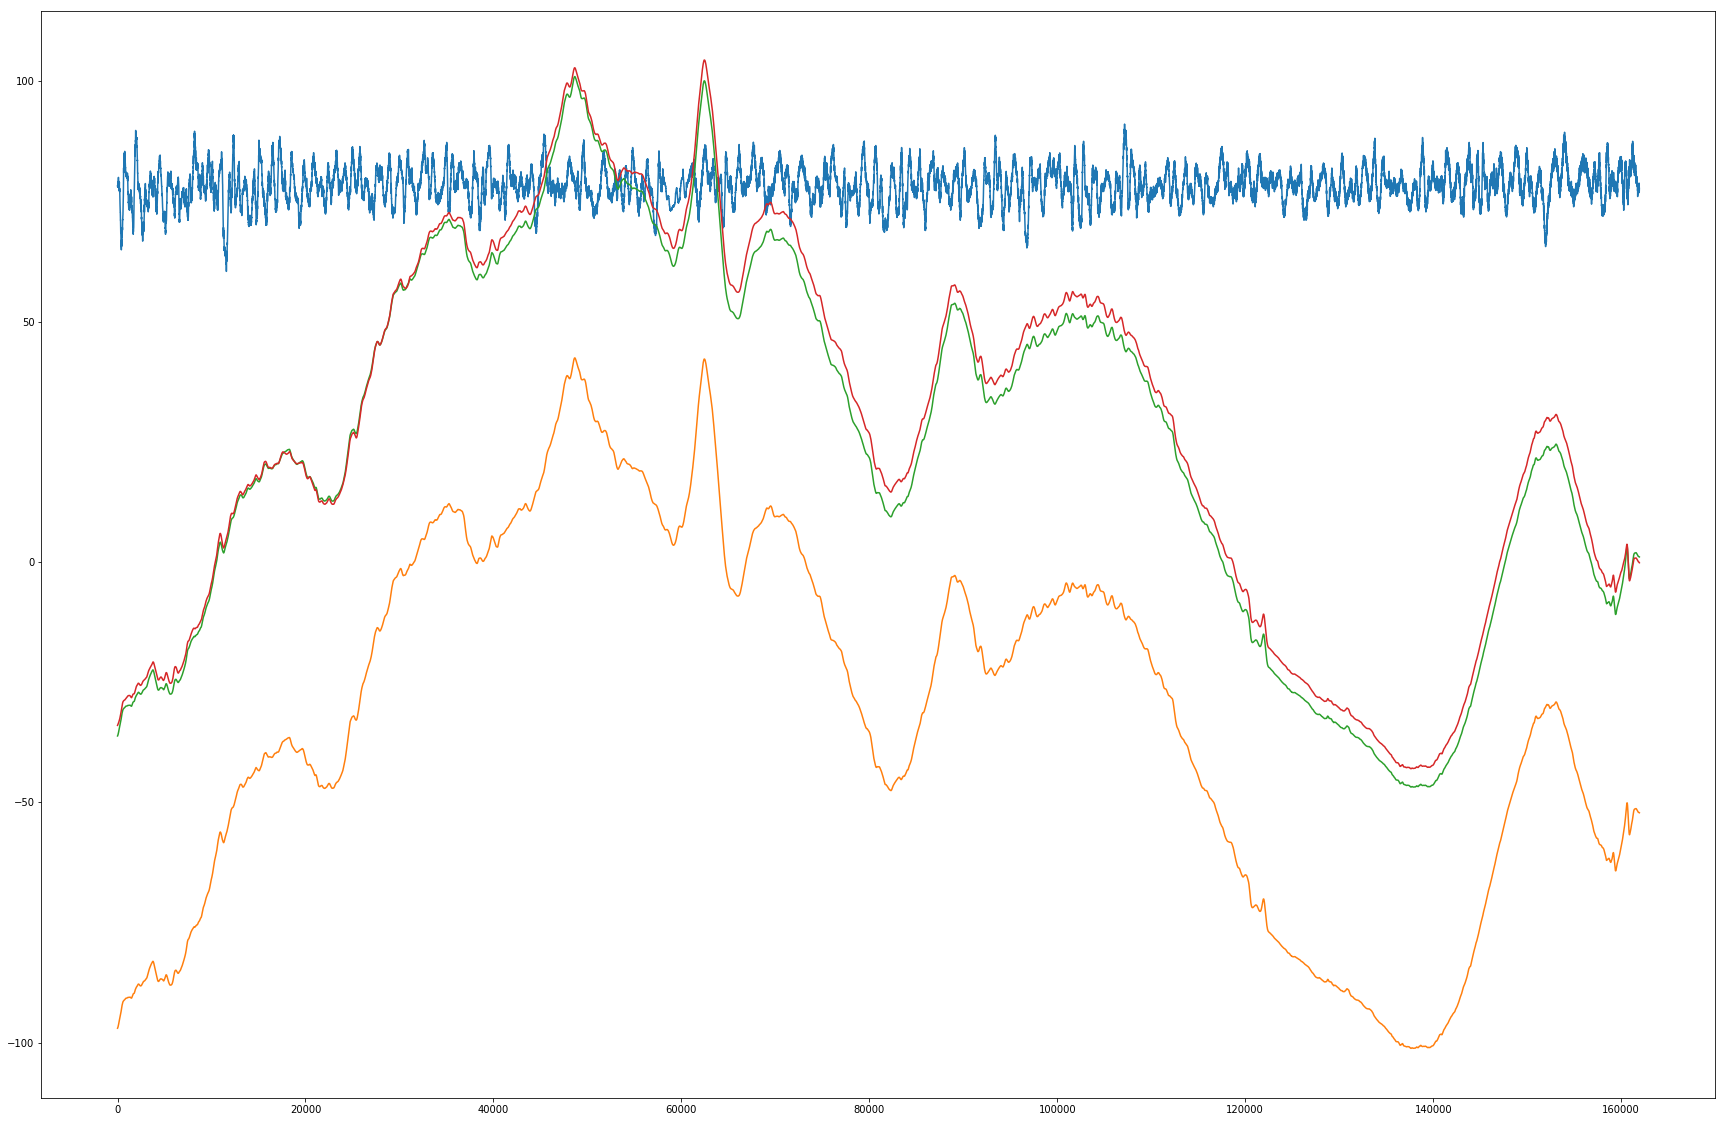

In [10]:
# Plot data points against line distance for line 100060
plt.figure(figsize=(30,20))   
for varname in line_dict.keys():
    if varname != 'coordinates':
        print(varname)
        plt.plot(utm_distances, line_dict[varname])

In [11]:
# Grid points to 100m resolution in UTM
utm_mag_awags_grid, crs, geotransform = netcdf_line_utils.utm_grid_points(utm_grid_resolution=100.0, 
                                               variables='mag_awags', 
                                               native_grid_bounds=bounds,
                                               point_step=1)
print(crs)
print(geotransform)
print(utm_mag_awags_grid.shape)

PROJCS["UTM Zone 53, Southern Hemisphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",135],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1]]
[694750.0, 100.0, 0, 6901150.0, 0, -100.0]
(1129, 1003)


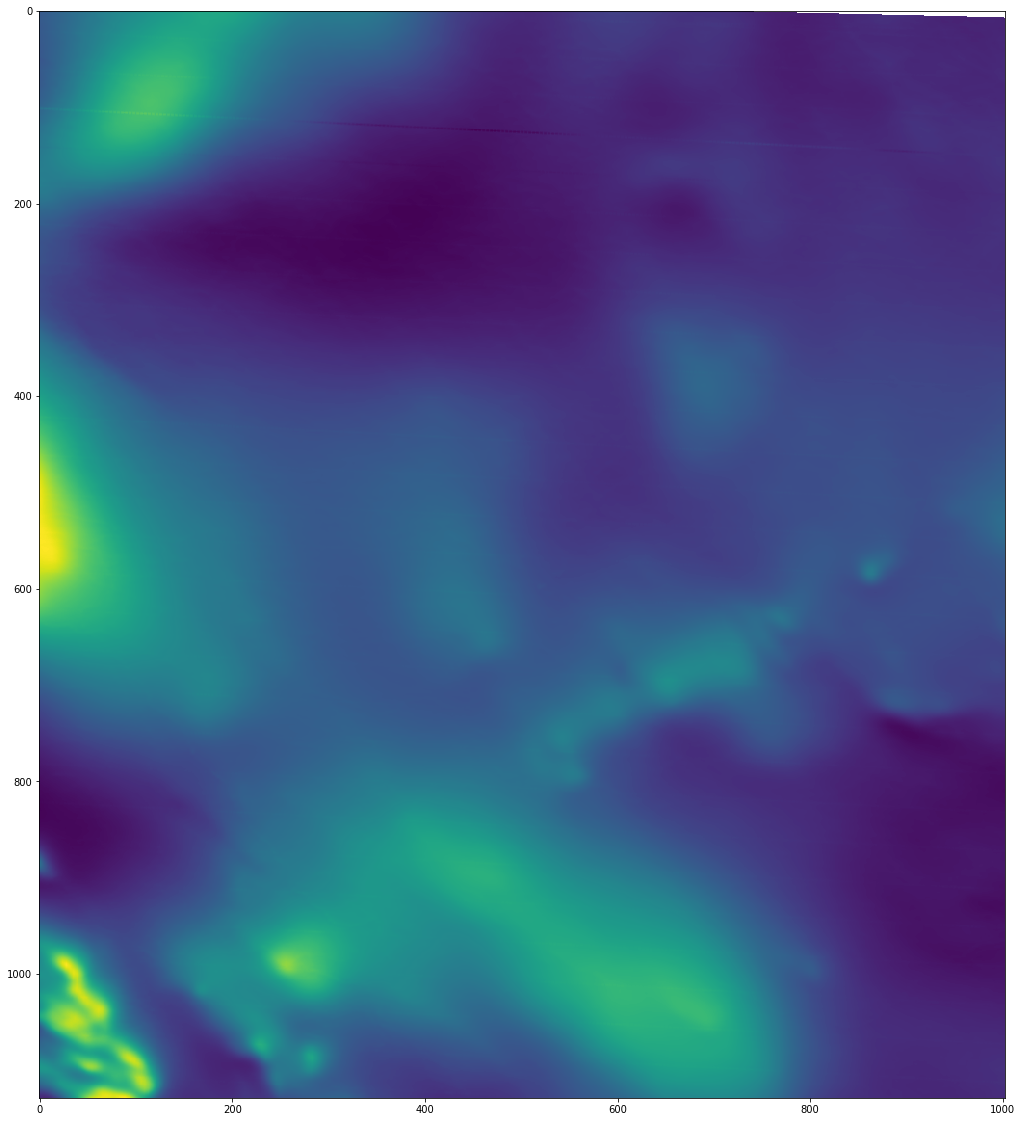

In [12]:
plt.figure(figsize=(30,20))    
plt.imshow(utm_mag_awags_grid)